#### Test Statistics: Sigma_one^2 and Sigma_two^2 are Unknown and assumed Unequal

In [212]:
from scipy import stats

stats.t.ppf(0.025, 13)      # critical t-value

-2.160368656461013

In [213]:
metro = [3, 7, 25, 10, 15, 6, 12, 25, 15, 7]
rural = [48, 44, 40, 38, 33, 21, 20, 12, 1, 18]

In [214]:
stats.ttest_ind(metro, rural, equal_var=False)

Ttest_indResult(statistic=-2.7669395785560558, pvalue=0.015827284816100885)

### Inferences about the difference between two population means: Matched Samples

In [215]:
KARL = [1.186, 1.151, 1.322, 1.339, 1.200, 1.402, 1.365, 1.537, 1.559]
LEH = [1.061, 0.992, 1.063, 1.062, 1.065, 1.178, 1.037, 1.086, 1.052]

In [216]:
stats.ttest_rel(KARL, LEH)

Ttest_relResult(statistic=6.0819394375848255, pvalue=0.00029529546278604066)

Saint John's Wort vs Placebo for curing depression 

In [217]:
import math
def two_samp_proportion(p1, p2, n1, n2):
    p_pool = ((p1*n2)+(p2*n1))/(n1+n2)
    x = (p_pool*(1-p_pool)*((1/n1)+(1/n2)))
    s = math.sqrt(x)
    z = (p1-p2)/s
    if(z<0):
        p_val = stats.norm.cdf(z)
    else:
        p_val = 1 - stats.norm.cdf(z)
    return z, p_val*2

In [218]:
two_samp_proportion(0.27, 0.19, 100, 100)

(1.3442056254198995, 0.17888190308175567)

In [219]:
stats.norm.cdf(1.3442056254198995)

0.9105590484591222

F-statistics and table

In [220]:
import numpy as np
import pandas as pd
import math
from scipy import stats
import scipy

In [221]:
scipy.stats.f.ppf(q=1-0.05, dfn=15, dfd=10)

2.8450165269958436

In [222]:
scipy.stats.f.ppf(q=0.05, dfn=15, dfd=10)

0.3931252536255495

F test examples

In [223]:
X = [3, 7, 25, 10, 15, 6, 12, 25, 15, 7]
Y = [48, 44, 40, 38, 33, 21, 20, 12, 1, 18]

import numpy as np

In [224]:
F = np.var(X)/np.var(Y)

dfn = len(X) - 1
dfd = len(Y) - 1

In [225]:
p_value = scipy.stats.f.cdf(F, dfn, dfd)

In [226]:
p_value

0.024680183438910465

Determining the sample size

In [227]:
import pandas as pd
import numpy as np
from scipy import stats
import math

In [228]:
def sample_size(alpha, beta, mu1, mu2, sigma):
    z1 = stats.norm.ppf(alpha)
    z2 = stats.norm.ppf(beta)
    n = (((z1 + z2)**2)*(sigma**2))/((mu1 - mu2)**2)
    print(n)

In [229]:
sample_size(0.05, 0.1, 12, 12.75, 3.2)

155.900083325938


#### ANOVA with Python

In [230]:
a = [4, 3, 2]
b = [2, 4, 6]
c = [2, 1, 3]

In [231]:
stats.f_oneway(a, b, c)

F_onewayResult(statistic=1.5, pvalue=0.2962962962962962)

pd.melt allows you to unpivot data from a wide format into long format

In [232]:
import pandas as pd
import numpy as np
import math
from scipy import stats
import scipy
import statsmodels.api as sm
from statsmodels.formula.api import ols
from matplotlib import pyplot as plt

In [233]:
data = pd.read_excel('Data Files\oneway.xlsx')

In [234]:
data

,Black Board,Case Presentation,PPT
0,4,2,2
1,3,4,1
2,2,6,3


In [235]:
data_new = pd.melt(data.reset_index(), id_vars=['index'])
data_new.columns=['index', 'Treatments', 'value']

In [236]:
data_new

,index,Treatments,value
0,0,Black Board,4
1,1,Black Board,3
2,2,Black Board,2
3,0,Case Presentation,2
4,1,Case Presentation,4
5,2,Case Presentation,6
6,0,PPT,2
7,1,PPT,1
8,2,PPT,3


In [237]:
model = ols('value ~ C(Treatments)', data=data_new).fit()

In [238]:
anova_table = sm.stats.anova_lm(model, typ=1)

In [239]:
anova_table

,df,sum_sq,mean_sq,F,PR(>F)
C(Treatments),2.0,6.0,3.0,1.5,0.296296
Residual,6.0,12.0,2.0,NaN,NaN


#### Post Hoc Analysis

In [240]:
five_percent = [7, 8, 15, 11, 9, 10]
ten_percent = [12, 17, 13, 18, 19, 15]
fifteen_percent = [14, 18, 19, 17, 16, 18]
twenty_percent = [19, 25, 22, 23, 18, 20]

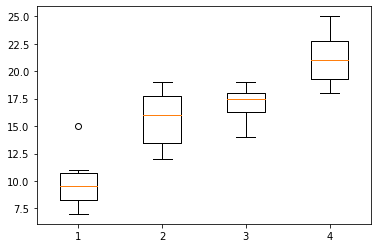

In [241]:
box_plot_data = [five_percent, ten_percent, fifteen_percent, twenty_percent]
plt.boxplot(box_plot_data)
plt.show()

Anova table is summarized as follows:

In [242]:
from scipy import stats
1 - scipy.stats.f.cdf(19.6, 3, 20) # p-value

3.599599239012541e-06

In [243]:
scipy.stats.f.ppf(1-0.01, dfn=3, dfd=20)

4.938193382310539

We reject H0 since f(0.01, 3, 30) = 4.94

In [244]:
scipy.stats.f_oneway(five_percent, ten_percent, fifteen_percent, twenty_percent)

F_onewayResult(statistic=19.605206999573184, pvalue=3.5925782584743027e-06)

In [245]:
import pandas as pd
import numpy as np
import scipy 
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [246]:
df = pd.read_excel('Data Files\Tensile strength of paper.xlsx')
df

,hardwood concentration 5%,hardwood concentration 10%,hardwood concentration 15%,hardwood concentration 20%
0,7,12,14,19
1,8,17,18,25
2,15,13,19,22
3,11,18,17,23
4,9,19,16,18
5,10,15,18,20


In [247]:
data_r1 = pd.melt(df.reset_index(), id_vars=['index'], value_vars=['hardwood concentration 5%', 'hardwood concentration 10%', 'hardwood concentration 15%', 'hardwood concentration 20%'])
data_r1.columns = ['index', 'treatments', 'value']
data_r1

,index,treatments,value
0,0,hardwood concentration 5%,7
1,1,hardwood concentration 5%,8
2,2,hardwood concentration 5%,15
3,3,hardwood concentration 5%,11
4,4,hardwood concentration 5%,9
5,5,hardwood concentration 5%,10
6,0,hardwood concentration 10%,12
7,1,hardwood concentration 10%,17
8,2,hardwood concentration 10%,13
9,3,hardwood concentration 10%,18


In [248]:
model = ols('value ~ C(treatments)', data=data_r1).fit()

In [249]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  value   R-squared:                       0.746
Model:                            OLS   Adj. R-squared:                  0.708
Method:                 Least Squares   F-statistic:                     19.61
Date:                Wed, 02 Mar 2022   Prob (F-statistic):           3.59e-06
Time:                        21:57:06   Log-Likelihood:                -54.344
No. Observations:                  24   AIC:                             116.7
Df Residuals:                      20   BIC:                             121.4
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===============================================================================================================
                                                  coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------------
Intercept                                      15.6667      1.041     15.042      0.000      13.494      17.839
C(treatments)[T.hardwood concentration 15%]     1.3333      1.473      0.905      0.376      -1.739       4.406
C(treatments)[T.hardwood concentration 20%]     5.5000      1.473      3.734      0.001       2.428       8.572
C(treatments)[T.hardwood concentration 5%]     -5.6667      1.473     -3.847      0.001      -8.739      -2.594
==============================================================================
Omnibus:                        0.929   Durbin-Watson:                   2.181
Prob(Omnibus):                  0.628   Jarque-Bera (JB):                0.861
Skew:                           0.248   Prob(JB):                        0.650
Kurtosis:                       2.215   Cond. No.                         4.79
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [250]:
aov_table = sm.stats.anova_lm(model, typ=1)
aov_table

,df,sum_sq,mean_sq,F,PR(>F)
C(treatments),3.0,382.791667,127.597222,19.605207,0.000004
Residual,20.0,130.166667,6.508333,NaN,NaN


LSD Test

In [251]:
import math
t = -1*scipy.stats.t.ppf(0.025, 20)
n = 6
MSE = 6.508333
lsd = t*math.sqrt(2*MSE/n)
lsd

3.072422588325206

Tukey's Test

In [252]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from statsmodels.stats.multicomp import MultiComparison

mc = MultiComparison(data_r1['value'], data_r1['treatments'])
mc_result = mc.tukeyhsd(0.05)
mc_result.summary()

group1,group2,meandiff,p-adj,lower,upper,reject
hardwood concentration 10%,hardwood concentration 15%,1.3333,0.7827,-2.7894,5.4561,False
hardwood concentration 10%,hardwood concentration 20%,5.5,0.0066,1.3773,9.6227,True
hardwood concentration 10%,hardwood concentration 5%,-5.6667,0.0051,-9.7894,-1.5439,True
hardwood concentration 15%,hardwood concentration 20%,4.1667,0.047,0.0439,8.2894,True
hardwood concentration 15%,hardwood concentration 5%,-7.0,0.001,-11.1227,-2.8773,True
hardwood concentration 20%,hardwood concentration 5%,-11.1667,0.001,-15.2894,-7.0439,True


Following table shows observed tensile strength (lb / in square) of different clothes having different weight percentage of cotton

Check whether having different weight percentage of cotton, plays any role in tensile strength (lb / in square) of clothes

In [253]:
df = pd.read_excel('Data Files\cotton weight.xlsx')
df

,cotwt.15,cotwt.20,cotwt.25,cotwt.30,cotwt.35
0,7,12,14,19,7
1,7,17,18,25,10
2,15,12,18,22,11
3,11,18,19,19,15
4,9,18,19,23,11


In [254]:
data_new = pd.melt(df.reset_index(), id_vars=['index'], value_vars=['cotwt.15', 'cotwt.20', 'cotwt.25', 'cotwt.30', 'cotwt.35'])
data_new.columns = ['index', 'weights', 'value']
data_new

,index,weights,value
0,0,cotwt.15,7
1,1,cotwt.15,7
2,2,cotwt.15,15
3,3,cotwt.15,11
4,4,cotwt.15,9
5,0,cotwt.20,12
6,1,cotwt.20,17
7,2,cotwt.20,12
8,3,cotwt.20,18
9,4,cotwt.20,18


In [255]:
model = ols('value ~ C(weights)', data=data_new).fit()

In [256]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  value   R-squared:                       0.747
Model:                            OLS   Adj. R-squared:                  0.696
Method:                 Least Squares   F-statistic:                     14.76
Date:                Wed, 02 Mar 2022   Prob (F-statistic):           9.13e-06
Time:                        21:57:06   Log-Likelihood:                -58.771
No. Observations:                  25   AIC:                             127.5
Df Residuals:                      20   BIC:                             133.6
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                  9.8000      1.270      7.719      0.000       7.152      12.448
C(weights)[T.cotwt.20]     5.6000      1.796      3.119      0.005       1.855       9.345
C(weights)[T.cotwt.25]     7.8000      1.796      4.344      0.000       4.055      11.545
C(weights)[T.cotwt.30]    11.8000      1.796      6.572      0.000       8.055      15.545
C(weights)[T.cotwt.35]     1.0000      1.796      0.557      0.584      -2.745       4.745
==============================================================================
Omnibus:                        1.435   Durbin-Watson:                   2.402
Prob(Omnibus):                  0.488   Jarque-Bera (JB):                0.957
Skew:                           0.106   Prob(JB):                        0.620
Kurtosis:                       2.065   Cond. No.                         5.83
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [257]:
aov_table = sm.stats.anova_lm(model, typ=1)
aov_table

,df,sum_sq,mean_sq,F,PR(>F)
C(weights),4.0,475.76,118.94,14.756824,0.000009
Residual,20.0,161.20,8.06,NaN,NaN


In [258]:
scipy.stats.f.ppf(1-0.05, dfn=4, dfd=20)

2.8660814020156584

In [259]:
mc = MultiComparison(data_new['value'], data_new['weights'])
mc_results = mc.tukeyhsd(0.05)
mc_results.summary()

group1,group2,meandiff,p-adj,lower,upper,reject
cotwt.15,cotwt.20,5.6,0.0385,0.2266,10.9734,True
cotwt.15,cotwt.25,7.8,0.0026,2.4266,13.1734,True
cotwt.15,cotwt.30,11.8,0.001,6.4266,17.1734,True
cotwt.15,cotwt.35,1.0,0.9,-4.3734,6.3734,False
cotwt.20,cotwt.25,2.2,0.7148,-3.1734,7.5734,False
cotwt.20,cotwt.30,6.2,0.0189,0.8266,11.5734,True
cotwt.20,cotwt.35,-4.6,0.1165,-9.9734,0.7734,False
cotwt.25,cotwt.30,4.0,0.2102,-1.3734,9.3734,False
cotwt.25,cotwt.35,-6.8,0.0091,-12.1734,-1.4266,True
cotwt.30,cotwt.35,-10.8,0.001,-16.1734,-5.4266,True
